In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review
- conducted at https://pollev.com/jeremysanchez.

## New material

### Types of samples

In [2]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


#### **Task**: Take a convenience sample of size 5 from the `united` table. 

In [4]:
united.take(np.arange(5))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64


#### **Task**: Take some *determinstic* samples of 5 rows from the `united` table.

In [6]:
united.where('Destination', 'JFK').take(np.arange(5))

Row,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352


In [7]:
united.take(np.arange(start = 75, stop = 100, step = 5))

Row,Date,Flight Number,Destination,Delay
75,6/1/15,1138,MSY,10
80,6/1/15,1185,EWR,97
85,6/1/15,1204,SEA,4
90,6/1/15,1263,ORD,148
95,6/1/15,1291,BOS,-2


In [8]:
united.take(make_array(100,217,324,432,510))

Row,Date,Flight Number,Destination,Delay
100,6/1/15,1440,BOS,50
217,6/2/15,1074,ORD,7
324,6/3/15,525,LAX,-7
432,6/3/15,1723,KOA,11
510,6/4/15,1062,MSP,59


#### **Task**: Take some *random* samples of 5 rows from the `united` table.

##### Way 1: randomly pick a starting point and pick every 5th row from that point

In [17]:
start = np.random.choice(np.arange(1000))

In [18]:
start

302

In [19]:
random_sample_1 = united.take(np.arange(start, stop=start + 25, step=5))
random_sample_1

Row,Date,Flight Number,Destination,Delay
302,6/3/15,273,SEA,-5
307,6/3/15,322,SEA,-6
312,6/3/15,392,LAS,-3
317,6/3/15,464,PDX,-2
322,6/3/15,516,IAD,-7


##### Way 2: pick five rows at random

In [20]:
united.sample(k=5, with_replacement=False)

Row,Date,Flight Number,Destination,Delay
18,6/1/15,433,LAX,10
10464,8/9/15,758,JFK,-11
12337,8/21/15,1252,IAH,-1
5819,7/10/15,237,STL,4
11489,8/15/15,1756,BOS,-2


### Distributions also apply to random quantities

In [21]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


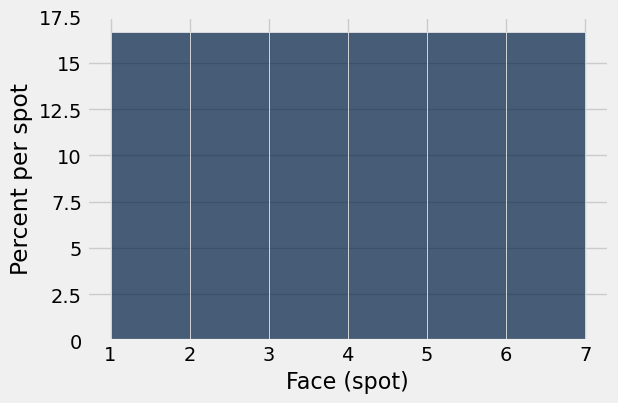

Each spot has an equal chance of being rolled


In [25]:
die.hist(bins = make_array(1,2,3,4,5,6,7),unit = 'spot')
plots.show()
print('Each spot has an equal chance of being rolled')

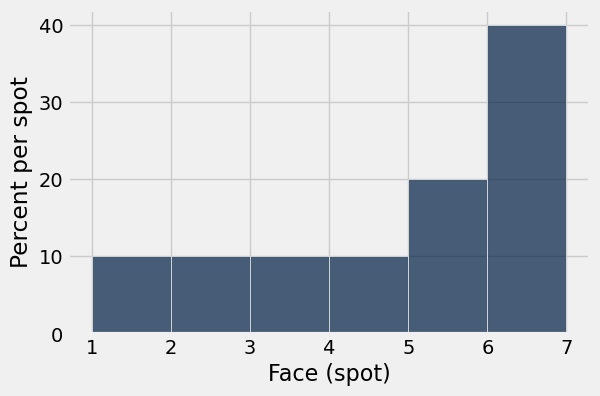

This distribution will vary each time you run this code!


In [30]:
die.sample(10).hist(bins = make_array(1,2,3,4,5,6,7),unit = 'spot')
plots.show()
print('This distribution will vary each time you run this code!')

### The LLN applies to empirical distributions

#### **Task (distributions)**: Create:
- The theoretical probability distribution of a six-sided die
- The observed probability distribution of a six-sided die after: 10, 100, 1,000 and 10,000 rolls.

**Theoretical distribution**

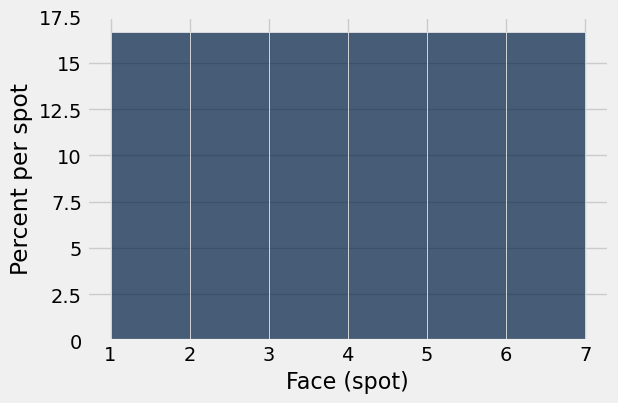

Each spot has an equal chance of being rolled


In [29]:
die.hist(bins = make_array(1,2,3,4,5,6,7),unit = 'spot')
plots.show()
print('Each spot has an equal chance of being rolled')

**Observed distributions**

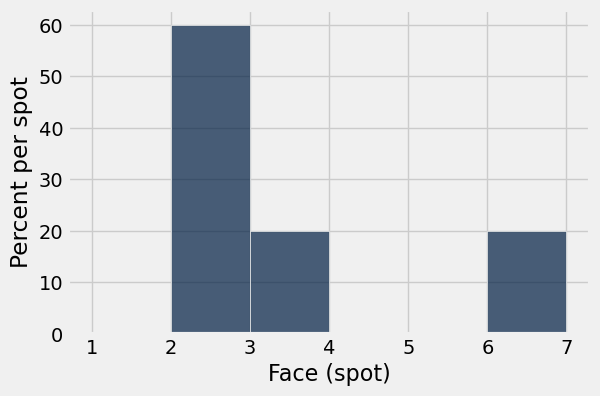

In [33]:
die.sample(5).hist(bins = make_array(1,2,3,4,5,6,7),unit = 'spot')
plots.show()

In [35]:
def observed_die_distribution(k):
    observed_die_rolls = die.sample(k)
    observed_die_rolls.hist(bins = make_array(1,2,3,4,5,6,7),unit = 'spot')
    plots.show()

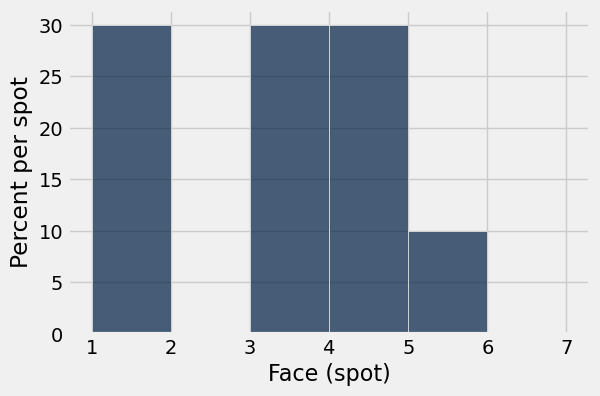

This doesn't look much like the theoretical distribution!


In [36]:
observed_die_distribution(10)
print("This doesn't look much like the theoretical distribution!")

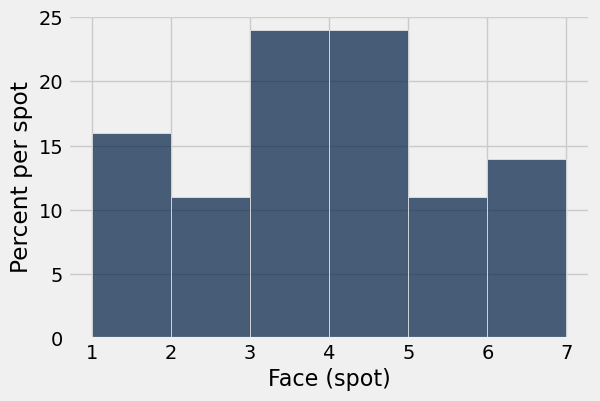

This looks closer to the theoretical distribution!


In [37]:
observed_die_distribution(100)
print('This looks closer to the theoretical distribution!')

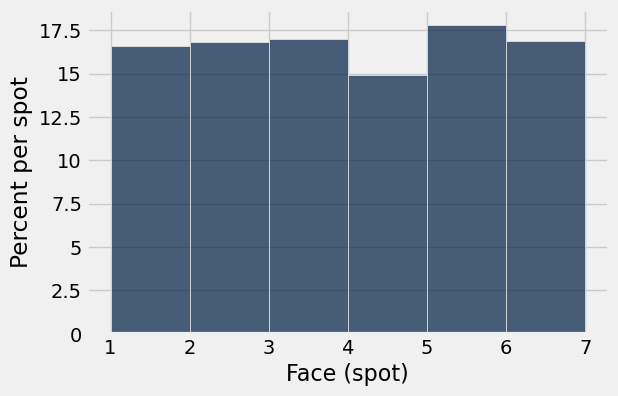

This looks much more like the theoretical distribution!


In [38]:
observed_die_distribution(1000)
print('This looks much more like the theoretical distribution!')

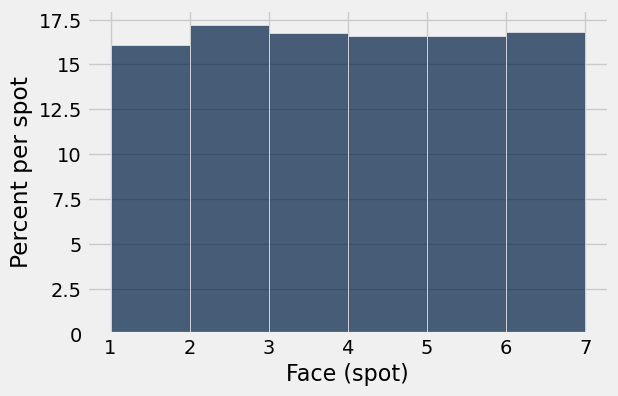

This looks a lot like the theoretical distribution!


In [39]:
observed_die_distribution(10000)
print('This looks a lot like the theoretical distribution!')

_____

#### **Task (quantities)**: Find or create
- The median delay time (in minutes) across all United flights from 6/1/15 to 8/9/15.
- The observed distribution of median delay times after taking samples (*with replacement*) of: 10, 100, 1,000 and 10,000 randomly sampled flights.

In [40]:
np.median(united.column('Delay'))

2.0

In [41]:
np.median(united.sample(10).column('Delay'))

-3.0

In [42]:
def observed_sample_median(sample_size):
    return np.median(united.sample(sample_size).column('Delay'))

In [43]:
observed_sample_median(100)

4.0

##### **Discussion** [1 min]: 
- What are the data type(s) of the input?
- What is the data type of the output?

In [44]:
def observed_sample_median_distribution(repetition_size, sample_size):

    observed_sample_medians = make_array()

    for i in np.arange(repetition_size):
        new_median = observed_sample_median(sample_size)
        observed_sample_medians = np.append(observed_sample_medians, new_median)

    return observed_sample_medians

##### **Discussion** [1 min]: How should I set the arguments to this function so that the LLN is invoked?

In [45]:
results = observed_sample_median_distribution(repetition_size=1000,sample_size=100)

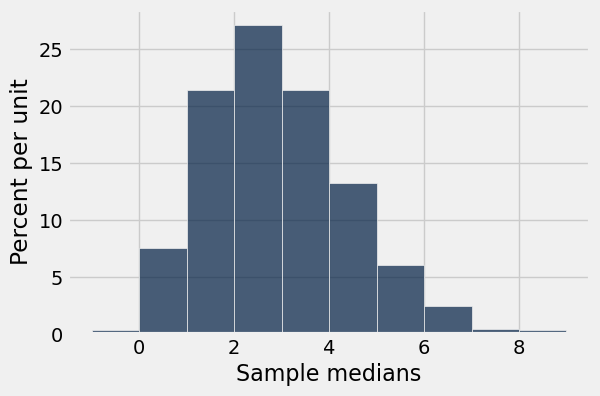

In [48]:
Table().with_column('Sample medians', results).hist()
plots.show()